In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


## Loading and Exploring the dataset

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [8]:
df.shape

(381, 13)

## Handling Missing values


In [9]:
df = df.drop(['Loan_ID'],axis = 1)

In [10]:
df.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df['Gender']= df['Gender'].fillna(df['Gender'].mode().iloc[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().iloc[0]).astype(int)
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0]).astype(int)

df['Dependents'] = df['Dependents'].replace(['0', '1', '2', '3+'], [0,1,2,3,])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode().iloc[0])
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)
df['LoanAmount'] = df['LoanAmount'].astype(int)


In [12]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1.0,Graduate,No,4583,1508,128,360,1,Rural,N
1,Male,Yes,0.0,Graduate,Yes,3000,0,66,360,1,Urban,Y
2,Male,Yes,0.0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
3,Male,No,0.0,Graduate,No,6000,0,141,360,1,Urban,Y
4,Male,Yes,0.0,Not Graduate,No,2333,1516,95,360,1,Urban,Y


In [40]:
   feature_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 
                     'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

## Converting categorical data into numerical form


In [14]:
def cat_to_num(df,x) : 
    for i in x : 
        unique_value = df[i].unique()
        df[i].replace(unique_value,[0,1],inplace = True)
        
    for i in ['Property_Area'] : 
        unique_value = df[i].unique()
        df[i].replace(unique_value,[0,1,3],inplace = True)
        

In [15]:
x = ['Gender','Married','Education','Self_Employed','Loan_Status']

cat_to_num(df,x)

In [16]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1.0,0,0,4583,1508,128,360,1,0,0
1,0,0,0.0,0,1,3000,0,66,360,1,1,1
2,0,0,0.0,1,0,2583,2358,120,360,1,1,1
3,0,1,0.0,0,0,6000,0,141,360,1,1,1
4,0,0,0.0,1,0,2333,1516,95,360,1,1,1


## Data Visualization

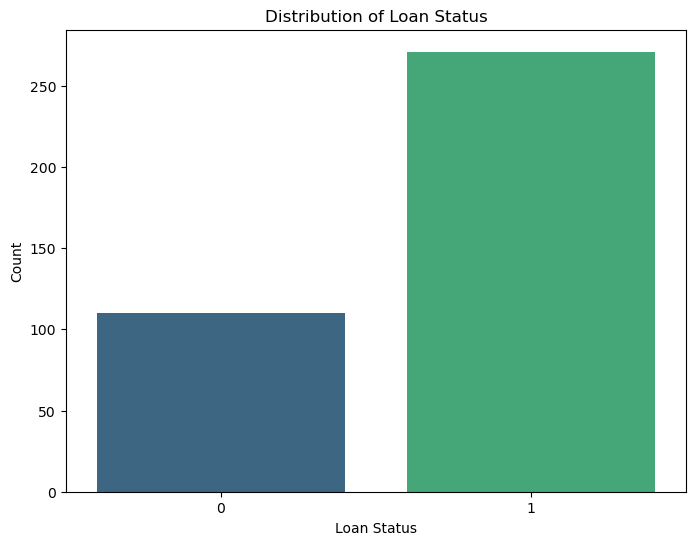

In [17]:
# Distribution of Loan Status 
plt.figure(figsize=(8,6))
sns.countplot(x='Loan_Status',data=df,palette='viridis')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

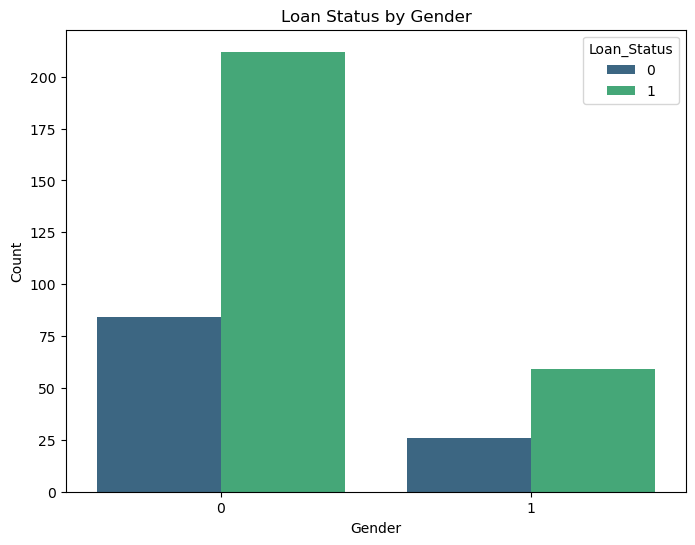

In [18]:
#Gender vs Loan Status 
plt.figure(figsize=(8,6))
sns.countplot(x='Gender',hue='Loan_Status',data=df,palette='viridis')
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

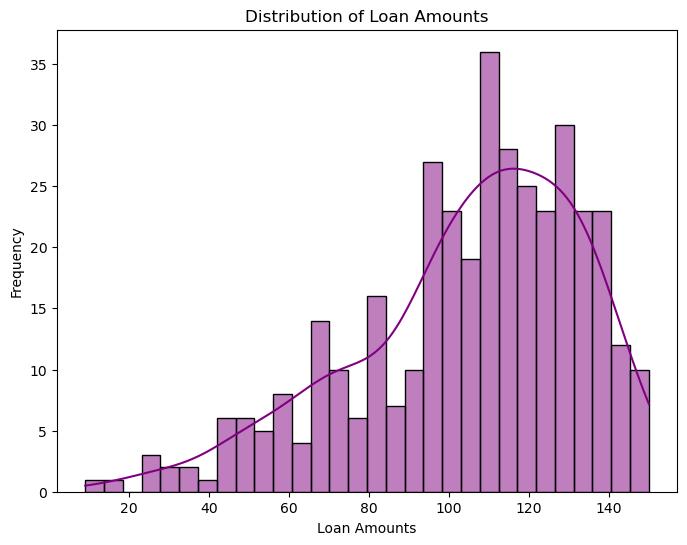

In [19]:
# Loan Amount Distribution 
plt.figure(figsize=(8,6))
sns.histplot(df['LoanAmount'].dropna(),kde = True , bins=30 , color = 'purple')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amounts')
plt.ylabel('Frequency')
plt.show()


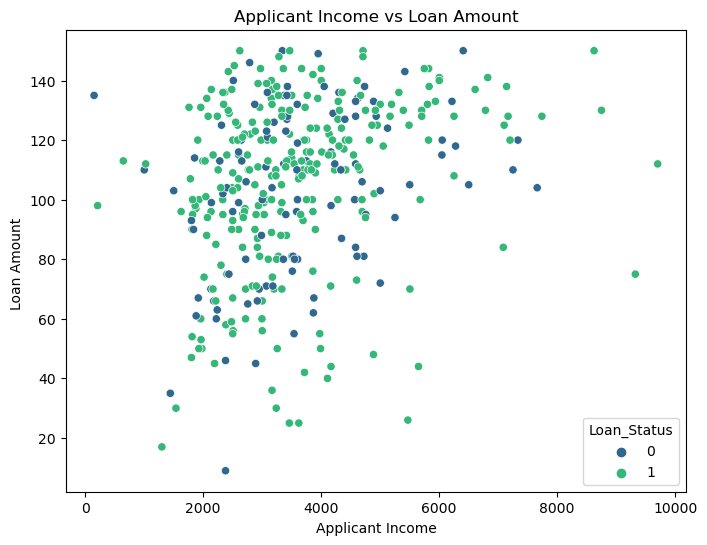

In [20]:
# Income vs Loan Amount 
plt.figure(figsize=(8,6))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',data = df , palette='viridis')
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount ')
plt.show()

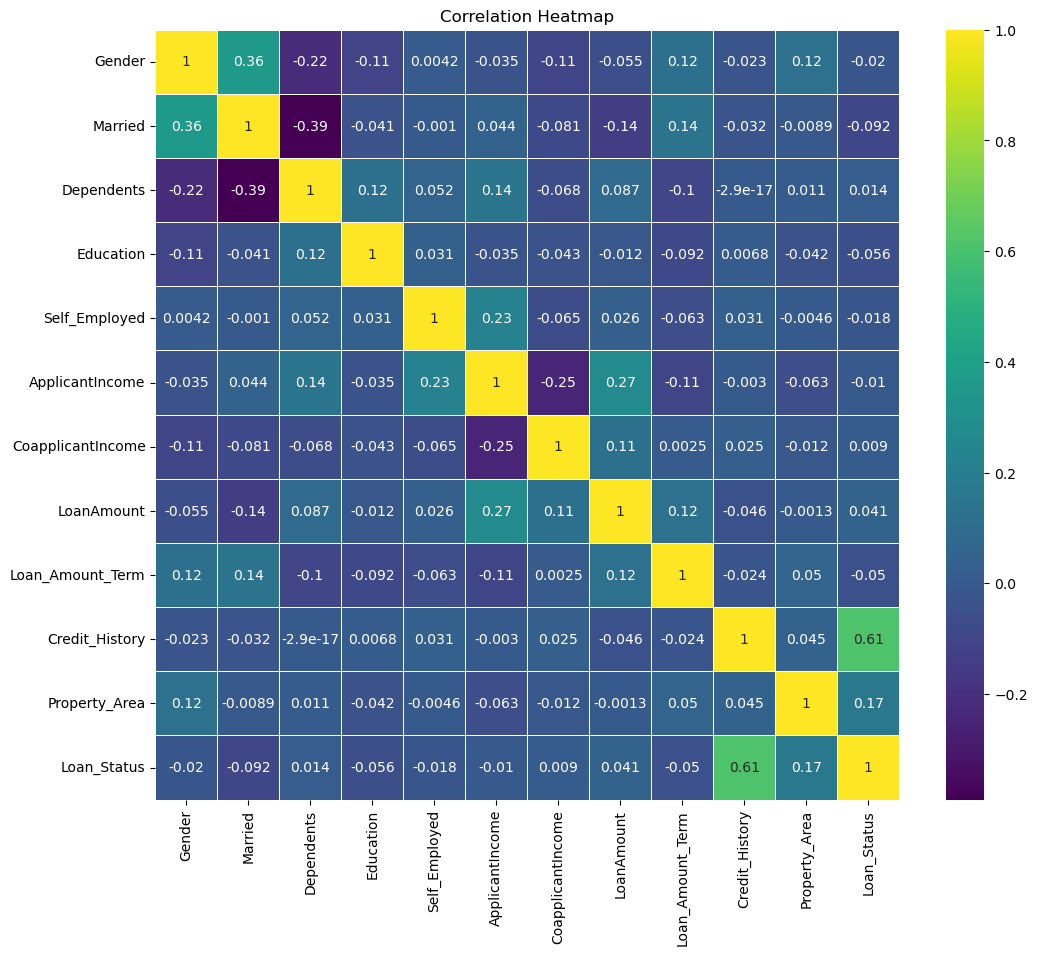

In [21]:
# Heatmap of Correlations
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Preprocessing Data


In [22]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

import pickle

X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [23]:
X.shape,y.shape

((381, 11), (381,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((304, 11), (304,), (77, 11), (77,))

In [26]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model - XGBoost Model

In [27]:
# Train the XGBoost model
model = xgb.XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy and ROC AUC score
accuracy = accuracy_score(y_test, y_pred)
roc_score = roc_auc_score(y_test, y_pred)


print(f'Accuracy Score: {accuracy*100:.2f}%')
print(f'ROC AUC Score: {roc_score*100:.2f}%')




Accuracy Score: 81.82%
ROC AUC Score: 69.64%


In [28]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)

# Calculate Precision
precision = precision_score(y_test, y_pred)

# Calculate Recall
recall = recall_score(y_test, y_pred)

# Display metrics
print(f'Confusion Matrix:\n{conf_matrix}')


Confusion Matrix:
[[ 9 12]
 [ 2 54]]


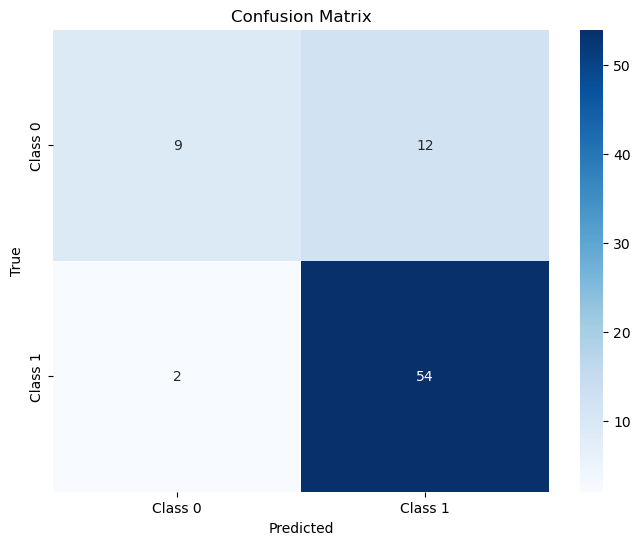

In [29]:

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [30]:
print(f'F1 Score:{f1:.2f}')


F1 Score:0.89


In [31]:
print(f'Precision:{precision:.2f}')


Precision:0.82


In [37]:
print(f'Recall:{recall:.2f}')

Recall:0.96


In [39]:
# Save the model, scaler, and feature names
with open('loan_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)